## KNN Regression Model
In this dataset we have 3 features: loudness, duration and bpm as outcome (dependant) variable. First, I'll create KNN regression model with single feature, later with 2 features. At the end I'll calculate the accuracy of the models for both conditions.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


In [2]:
# create dataframe
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

## 1. KNN Regression with a sigle feature: Unweighted

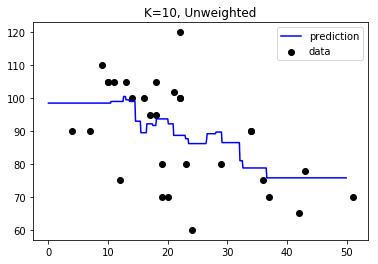

In [3]:
# create the model
knn = KNeighborsRegressor(n_neighbors = 10)
X = pd.DataFrame(music['loudness'])
Y = music.bpm

# fit the model
knn.fit(X,Y)

# set up the prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# predict
Y_ = knn.predict(T)


plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='b', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()


## 2. KNN Regression with a sigle feature: Weighted

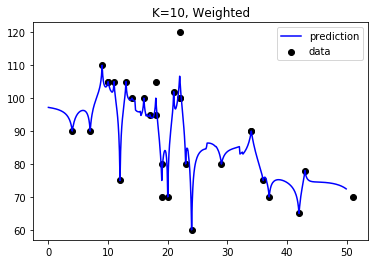

In [4]:
#  create model with weights
knn_w = KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
X = pd.DataFrame(music['loudness'])
Y = music.bpm

knn_w.fit(X,Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='b', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

## Cross-Validation

In [5]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


## 3. KNN Regression with all features: Unweighted

In [23]:
knn2 = KNeighborsRegressor(n_neighbors = 10)
X = pd.DataFrame(music[['loudness', 'duration']])
Y = music.bpm

## 4. KNN Regression with all features: Weighted

In [24]:
knn2_w = KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
X = pd.DataFrame(music[['loudness', 'duration']])
Y = music.bpm

## Cross-Validation

In [25]:
score = cross_val_score(knn2, X, Y, cv=6)
print(score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=6)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

[-0.09058914  0.14930814 -0.2134433  -0.07558544 -0.08422727 -0.32600787]
Unweighted Accuracy: -0.11 (+/- 0.29)
[ 0.04504854  0.18762645 -0.11782338  0.23504446 -0.12381251 -0.23693566]
Weighted Accuracy: -0.00 (+/- 0.34)


I tried different combinations playing with the weight and number of nearest neighbors,  and couldn't find any good combination. Only one combination gave me 0 mean cross-validation accuracy which is better. 